# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

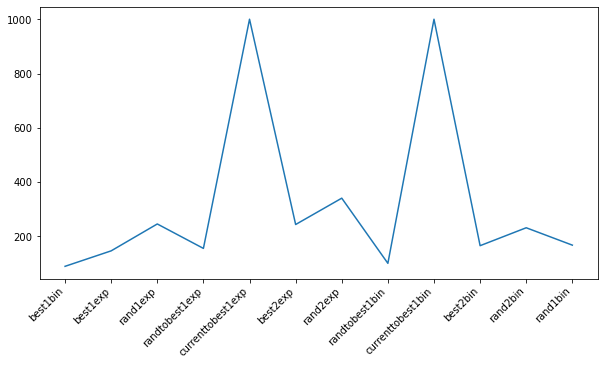

In [3]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp',
              'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
strategy_res = {}

for i in strategies:
    strategy_res[i] = differential_evolution(ackley, bounds, seed=42, strategy=i).nit

plt.figure(figsize=(10, 5))
plt.plot(strategy_res.keys(), strategy_res.values())
plt.xticks(rotation=45, ha="right")
plt.show()

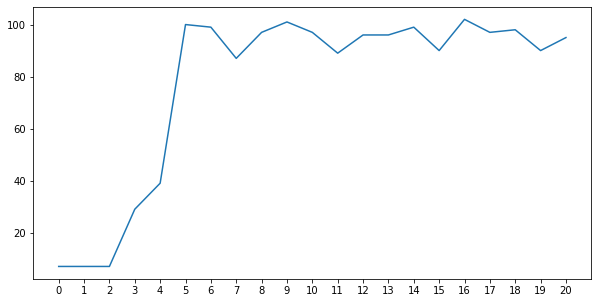

In [4]:
popsize_res = {}

for i in range(21):
    popsize_res[i] = differential_evolution(ackley, bounds, seed=42, popsize=i).nit

plt.figure(figsize=(10, 5))
plt.plot(popsize_res.keys(), popsize_res.values())
plt.xticks(list(popsize_res.keys()))
plt.show()

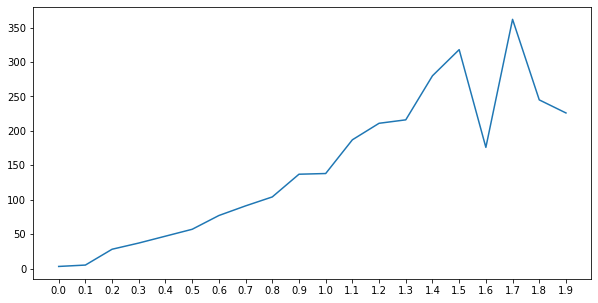

In [5]:
mutation_res = {}

for i in np.arange(0, 2, 0.1):
    mutation_res[i] = differential_evolution(ackley, bounds, seed=42, mutation=i).nit

plt.figure(figsize=(10, 5))
plt.plot(mutation_res.keys(), mutation_res.values())
plt.xticks(list(mutation_res.keys()))
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [6]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0, method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

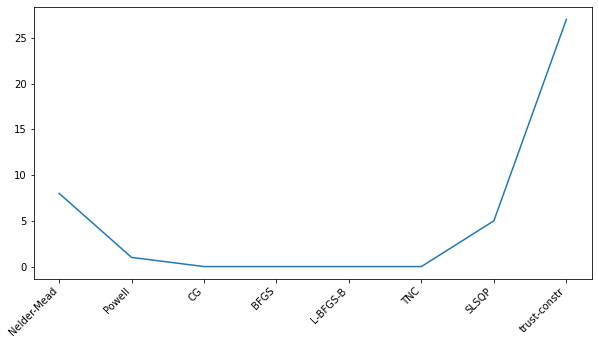

In [7]:
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'trust-constr']
method_res = {}

for i in methods:
    method_res[i] = minimize(ackley, x0, method=i).nit

plt.figure(figsize=(10, 5))
plt.plot(method_res.keys(), method_res.values())
plt.xticks(rotation=45, ha="right")
plt.show()

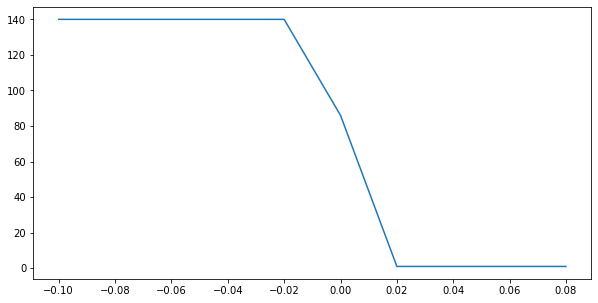

In [8]:
tol_res = {}

for i in np.arange(-0.1, 0.1, 0.02):
    tol_res[i] = minimize(ackley, x0, method='Nelder-Mead', tol=i).nit

plt.figure(figsize=(10, 5))
plt.plot(tol_res.keys(), tol_res.values())
plt.xticks(list(tol_res.keys()))
plt.show()

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
